In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler, StandardScaler

# 데이터 로드
file_path = 'dsets/group_pro/group_5565.csv'
data = pd.read_csv(file_path)

# 타임스탬프 컬럼을 datetime 형식으로 변환
data['tm'] = pd.to_datetime(data['tm'])

# 년, 월, 일 컬럼 추가
data['year'] = data['tm'].dt.year
data['month'] = data['tm'].dt.month
data['day'] = data['tm'].dt.day

data = data.drop(columns=['tm'])

summer_data = data[(data['month'] >= 6) & (data['month'] <= 8)]

print(summer_data.head(5))

      Index   num  hh24   n  stn  sum_qctr  sum_load  n_mean_load  nph_ta  \
3647  12408  5565    24  58  184     42250   4520.84    79.776051    18.1   
3648  12409  5565     1  58  184     42250   3915.44    79.776051    17.9   
3649  12410  5565     2  58  184     42250   3460.88    79.776051    17.7   
3650  12411  5565     3  58  184     42250   3150.60    79.776051    17.4   
3651  12412  5565     4  58  184     42250   2987.84    79.776051    17.3   

      nph_hm  nph_ws_10m  nph_rn_60m  nph_ta_chi  weekday  week_name   elec  \
3647    93.7         0.5         0.0        20.9        0          0  97.71   
3648    95.3         0.0         0.0        20.7        0          0  84.62   
3649    95.6         0.6         0.0        20.6        0          0  74.80   
3650    95.6         0.3         0.0        20.2        0          0  68.09   
3651    95.9         1.1         0.1        20.2        0          0  64.57   

      year  month  day  
3647  2020      6    1  
3648  2020  

In [2]:
# 필요한 특성 선택
features = ['num', 'year', 'month', 'day', 'hh24', 'weekday','week_name', 'nph_ta', 'nph_hm', 'nph_rn_60m', 'nph_ta_chi']
target = 'elec'

# 입력 데이터와 타겟 데이터 분리
input_data = summer_data[features]
target_data = summer_data[[target]]

# 데이터 확인
print(input_data.head())
print(target_data.head())

print(input_data.shape)

       num  year  month  day  hh24  weekday  week_name  nph_ta  nph_hm  \
3647  5565  2020      6    1    24        0          0    18.1    93.7   
3648  5565  2020      6    1     1        0          0    17.9    95.3   
3649  5565  2020      6    1     2        0          0    17.7    95.6   
3650  5565  2020      6    1     3        0          0    17.4    95.6   
3651  5565  2020      6    1     4        0          0    17.3    95.9   

      nph_rn_60m  nph_ta_chi  
3647         0.0        20.9  
3648         0.0        20.7  
3649         0.0        20.6  
3650         0.0        20.2  
3651         0.1        20.2  
       elec
3647  97.71
3648  84.62
3649  74.80
3650  68.09
3651  64.57
(6624, 11)


In [3]:
input_data['THI'] = 9/5*input_data['nph_ta'] - 0.55*(1-input_data['nph_hm']/100)*(9/5*input_data['nph_hm']-26)+32
def CDH(xs):
    ys = []
    for i in range(len(xs)):
        if i < 11:
             ys.append(np.sum(xs[:(i+1)]-26))
        else:
             ys.append(np.sum(xs[(i-11):(i+1)]-26))
    return np.array(ys)

cdhs = np.array([])
for num in range(len(input_data)):
    nph_ta = input_data[input_data['num'] == num]
    cdh = CDH(nph_ta['nph_ta'].values)
    cdhs = np.concatenate([cdhs, cdh])
input_data['CDH'] = cdhs

print(input_data.head(3))

print(input_data.shape)
print(target_data.shape)

C:\Users\ICS_Lab\AppData\Local\Temp\ipykernel_11760\2964883174.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  input_data['THI'] = 9/5*input_data['nph_ta'] - 0.55*(1-input_data['nph_hm']/100)*(9/5*input_data['nph_hm']-26)+32


       num  year  month  day  hh24  weekday  week_name  nph_ta  nph_hm  \
3647  5565  2020      6    1    24        0          0    18.1    93.7   
3648  5565  2020      6    1     1        0          0    17.9    95.3   
3649  5565  2020      6    1     2        0          0    17.7    95.6   

      nph_rn_60m  nph_ta_chi        THI   CDH  
3647         0.0        20.9  59.636831  -7.9  
3648         0.0        20.7  60.457791 -16.0  
3649         0.0        20.6  60.324864 -24.3  
(6624, 13)
(6624, 1)


C:\Users\ICS_Lab\AppData\Local\Temp\ipykernel_11760\2964883174.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  input_data['CDH'] = cdhs


In [8]:
train_feature = ['hh24','weekday','week_name', 'nph_ta', 'nph_hm', 'nph_rn_60m', 'nph_ta_chi', 'THI', 'CDH']
input_data = input_data[train_feature]
feature_dim = 9
print(input_data.head(3))

input_scaler = MinMaxScaler()
target_scaler = MinMaxScaler()

scaled_input_data = input_scaler.fit_transform(input_data)
scaled_target_data = target_scaler.fit_transform(target_data)

scaled_input_data = pd.DataFrame(scaled_input_data, columns=input_data.columns)
scaled_target_data = pd.DataFrame(scaled_target_data, columns=target_data.columns)

print(scaled_input_data.head(3))
print(scaled_input_data.shape)

      hh24  weekday  week_name  nph_ta  nph_hm  nph_rn_60m  nph_ta_chi  \
3647    24        0          0    18.1    93.7         0.0        20.9   
3648     1        0          0    17.9    95.3         0.0        20.7   
3649     2        0          0    17.7    95.6         0.0        20.6   

            THI   CDH  
3647  59.636831  -7.9  
3648  60.457791 -16.0  
3649  60.324864 -24.3  
       hh24  weekday  week_name    nph_ta    nph_hm  nph_rn_60m  nph_ta_chi  \
0  1.000000      0.0        0.0  0.228700  0.912052         0.0    0.325792   
1  0.000000      0.0        0.0  0.219731  0.938111         0.0    0.316742   
2  0.043478      0.0        0.0  0.210762  0.942997         0.0    0.312217   

        THI       CDH  
0  0.542109  0.564317  
1  0.562022  0.528634  
2  0.558798  0.492070  
(6624, 9)


### Daily Sequence

In [30]:
from sklearn.model_selection import train_test_split

seq_lenght = 24

def create_daily_sequences(input_data, target_data, seq_length=seq_lenght):
    x = []
    y = []
    for i in range(len(input_data) - seq_length):
        x.append(input_data.iloc[i:i + seq_length].values)
        y.append(target_data.iloc[i + seq_length - 1].values)  # Target is the next time step's target value
    return np.array(x), np.array(y)

# Assuming 'scaled_input_data' and 'scaled_target_data' are the preprocessed DataFrames
X_daily, y_daily = create_daily_sequences(scaled_input_data, scaled_target_data)

# Display the shape of the created sequences
print(X_daily.shape, y_daily.shape)


# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X_daily, y_daily, test_size=0.2, random_state=42)

print(X_test.shape, y_test.shape)

(6600, 24, 9) (6600, 1)
(1320, 24, 9) (1320, 1)


##### Basic Model

Epoch 1/100
755/755 [==============================] - 5s 4ms/step - loss: 0.0264 - val_loss: 0.0054
Epoch 2/100
755/755 [==============================] - 3s 4ms/step - loss: 0.0096 - val_loss: 0.0046
Epoch 3/100
755/755 [==============================] - 3s 4ms/step - loss: 0.0077 - val_loss: 0.0041
Epoch 4/100
755/755 [==============================] - 3s 4ms/step - loss: 0.0063 - val_loss: 0.0038
Epoch 5/100
755/755 [==============================] - 3s 4ms/step - loss: 0.0057 - val_loss: 0.0039
Epoch 6/100
755/755 [==============================] - 3s 4ms/step - loss: 0.0054 - val_loss: 0.0035
Epoch 7/100
755/755 [==============================] - 3s 4ms/step - loss: 0.0049 - val_loss: 0.0032
Epoch 8/100
755/755 [==============================] - 3s 4ms/step - loss: 0.0047 - val_loss: 0.0047
Epoch 9/100
755/755 [==============================] - 3s 4ms/step - loss: 0.0044 - val_loss: 0.0033
Epoch 10/100
755/755 [==============================] - 3s 4ms/step - loss: 0.0040 - val_lo

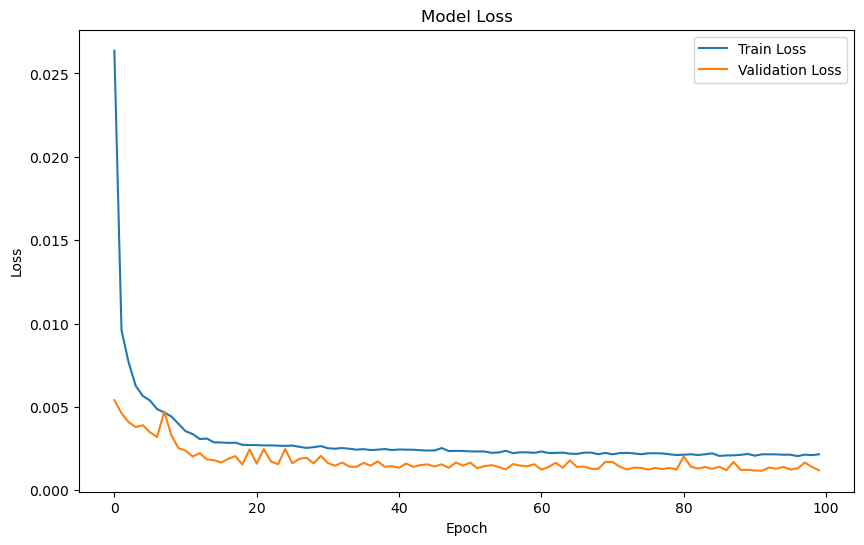

In [43]:
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

layer_1 = 24
lr = 0.001
epochs = 100
batch_size = 7
drop = 0.3

# Define the LSTM model
def create_model(input_shape):
    model = Sequential()
    model.add(LSTM(units=layer_1, return_sequences=False, input_shape=input_shape))
    model.add(Dropout(drop))
    model.add(Dense(units=1))
    return model

# Compile the model
model = create_model((seq_lenght, feature_dim))
model.compile(optimizer=Adam(learning_rate=lr), loss='mean_squared_error')

# Train the model
history = model.fit(X_train, y_train, epochs=epochs, batch_size=batch_size, validation_data=(X_test, y_test))

# Evaluate the model
loss = model.evaluate(X_test, y_test)
print(f'Test Loss: {loss}')

# Save the model
model_path = 'summer_model/summer_5565_v1.h5'
model.save(model_path)

# Plot training & validation loss values
plt.figure(figsize=(10, 6))
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(loc='upper right')
plt.show()


42/42 [==============================] - 0s 799us/step
(1320, 1)
Test MSE: 28.34432703118214


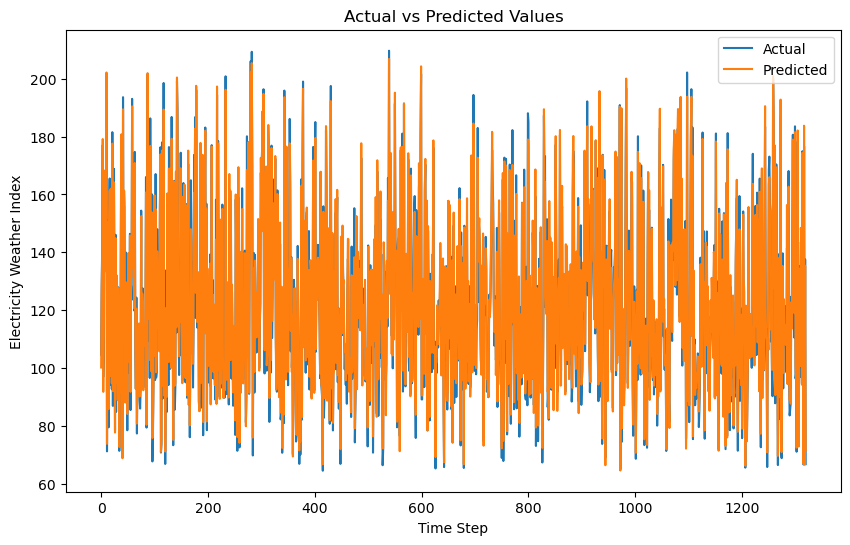

In [44]:
from keras.models import load_model
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error

# model_path = 'summer_5565.h5'
# model = load_model(model_path)

y_pred = model.predict(X_test)
print(y_pred.shape)

y_test_rescaled = target_scaler.inverse_transform(y_test)
y_pred_rescaled = target_scaler.inverse_transform(y_pred)

mse = mean_squared_error(y_test_rescaled, y_pred_rescaled)
print(f'Test MSE: {mse}')

plt.figure(figsize=(10, 6))
plt.plot(y_test_rescaled, label='Actual')
plt.plot(y_pred_rescaled, label='Predicted')
plt.title('Actual vs Predicted Values')
plt.xlabel('Time Step')
plt.ylabel('Electricity Weather Index')
plt.legend(loc='upper right')
plt.show()

layer_1 = 50
lr = 0.001
epochs = 30
batch_size = 32
drop = 0.3

Test MSE: 42.701625215158494

layer_1 = 32
lr = 0.001
epochs = 50
batch_size = 40
drop = 0.3

Test MSE: 35.39603688115288

layer_1 = 24
lr = 0.001
epochs = 100
batch_size = 40
drop = 0.3

Test MSE: 32.70916874632651

layer_1 = 24
lr = 0.001
epochs = 100
batch_size = 24
drop = 0.3

Test MSE: 30.939929957617814

layer_1 = 24
lr = 0.001
epochs = 100
batch_size = 7
drop = 0.3

Test MSE: 28.34432703118214 / Overfiting 위험

##### Deep

Epoch 1/100
176/176 [==============================] - 3s 8ms/step - loss: 0.0381 - val_loss: 0.0086
Epoch 2/100
176/176 [==============================] - 1s 5ms/step - loss: 0.0180 - val_loss: 0.0068
Epoch 3/100
176/176 [==============================] - 1s 5ms/step - loss: 0.0136 - val_loss: 0.0060
Epoch 4/100
176/176 [==============================] - 1s 5ms/step - loss: 0.0115 - val_loss: 0.0048
Epoch 5/100
176/176 [==============================] - 1s 5ms/step - loss: 0.0093 - val_loss: 0.0057
Epoch 6/100
176/176 [==============================] - 1s 5ms/step - loss: 0.0088 - val_loss: 0.0047
Epoch 7/100
176/176 [==============================] - 1s 5ms/step - loss: 0.0077 - val_loss: 0.0041
Epoch 8/100
176/176 [==============================] - 1s 5ms/step - loss: 0.0073 - val_loss: 0.0042
Epoch 9/100
176/176 [==============================] - 1s 5ms/step - loss: 0.0081 - val_loss: 0.0042
Epoch 10/100
176/176 [==============================] - 1s 5ms/step - loss: 0.0067 - val_lo

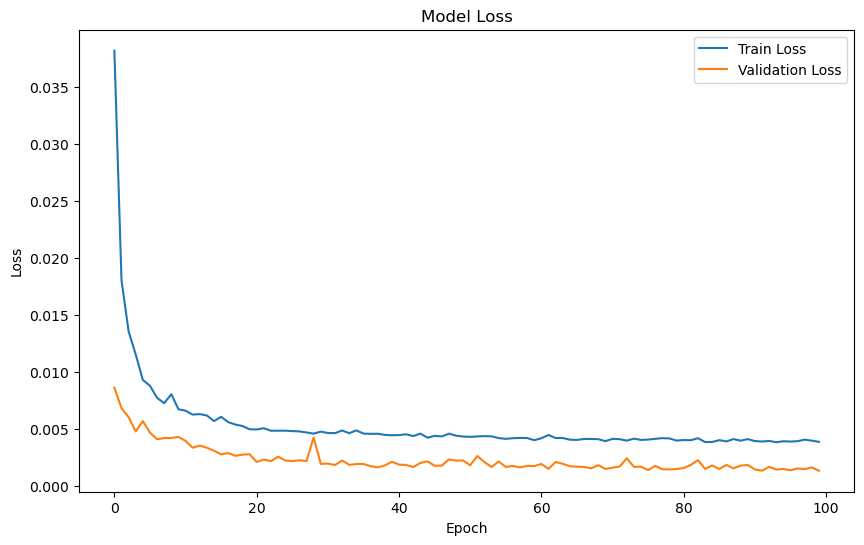

In [39]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
from tensorflow.keras.optimizers import Adam
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

layer_1 = 24
layer_2 = 7
lr = 0.001
epochs = 100
batch_size = 30
drop = 0.3
seq_length = 24  # Use the correct variable name here
feature_dim = 9  # Assuming the feature dimension is 9

# Define the LSTM model with an additional LSTM layer
def create_model(input_shape):
    model = Sequential()
    model.add(LSTM(units=layer_1, return_sequences=True, input_shape=input_shape))
    model.add(Dropout(drop))
    model.add(LSTM(units=layer_2, return_sequences=False))
    model.add(Dropout(drop))
    model.add(Dense(units=1))
    return model

# Compile the model
model = create_model((seq_length, feature_dim))
model.compile(optimizer=Adam(learning_rate=lr), loss='mean_squared_error')

# Train the model
history = model.fit(X_train, y_train, epochs=epochs, batch_size=batch_size, validation_data=(X_test, y_test))

# Evaluate the model
loss = model.evaluate(X_test, y_test)
print(f'Test Loss: {loss}')

# Save the model
model_path = 'summer_model/summer_5565_v1_deeper.h5'
model.save(model_path)

# Plot training & validation loss values
plt.figure(figsize=(10, 6))
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(loc='upper right')
plt.show()


42/42 [==============================] - 1s 2ms/step
(1320, 1)
Test MSE: 31.75901316834419


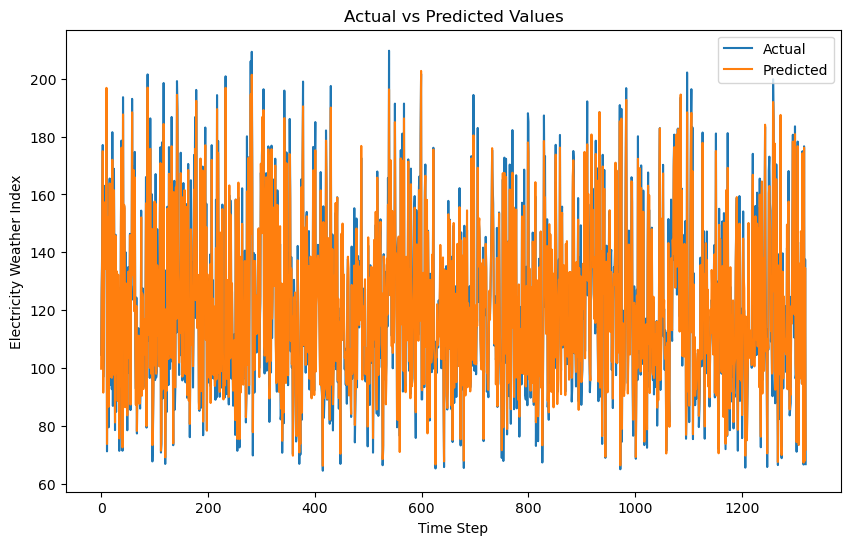

In [40]:
from keras.models import load_model
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error

# model_path = 'summer_5565.h5'
# model = load_model(model_path)

y_pred = model.predict(X_test)
print(y_pred.shape)

y_test_rescaled = target_scaler.inverse_transform(y_test)
y_pred_rescaled = target_scaler.inverse_transform(y_pred)

mse = mean_squared_error(y_test_rescaled, y_pred_rescaled)
print(f'Test MSE: {mse}')

plt.figure(figsize=(10, 6))
plt.plot(y_test_rescaled, label='Actual')
plt.plot(y_pred_rescaled, label='Predicted')
plt.title('Actual vs Predicted Values')
plt.xlabel('Time Step')
plt.ylabel('Electricity Weather Index')
plt.legend(loc='upper right')
plt.show()

##### Bidirectional

Epoch 1/100
755/755 [==============================] - 12s 11ms/step - loss: 0.0151 - val_loss: 0.0050
Epoch 2/100
755/755 [==============================] - 7s 9ms/step - loss: 0.0074 - val_loss: 0.0036
Epoch 3/100
755/755 [==============================] - 7s 10ms/step - loss: 0.0055 - val_loss: 0.0028
Epoch 4/100
755/755 [==============================] - 7s 10ms/step - loss: 0.0045 - val_loss: 0.0024
Epoch 5/100
755/755 [==============================] - 7s 9ms/step - loss: 0.0037 - val_loss: 0.0026
Epoch 6/100
755/755 [==============================] - 7s 10ms/step - loss: 0.0036 - val_loss: 0.0021
Epoch 7/100
755/755 [==============================] - 7s 10ms/step - loss: 0.0034 - val_loss: 0.0022
Epoch 8/100
755/755 [==============================] - 7s 10ms/step - loss: 0.0029 - val_loss: 0.0020
Epoch 9/100
755/755 [==============================] - 7s 10ms/step - loss: 0.0028 - val_loss: 0.0025
Epoch 10/100
755/755 [==============================] - 7s 10ms/step - loss: 0.0027

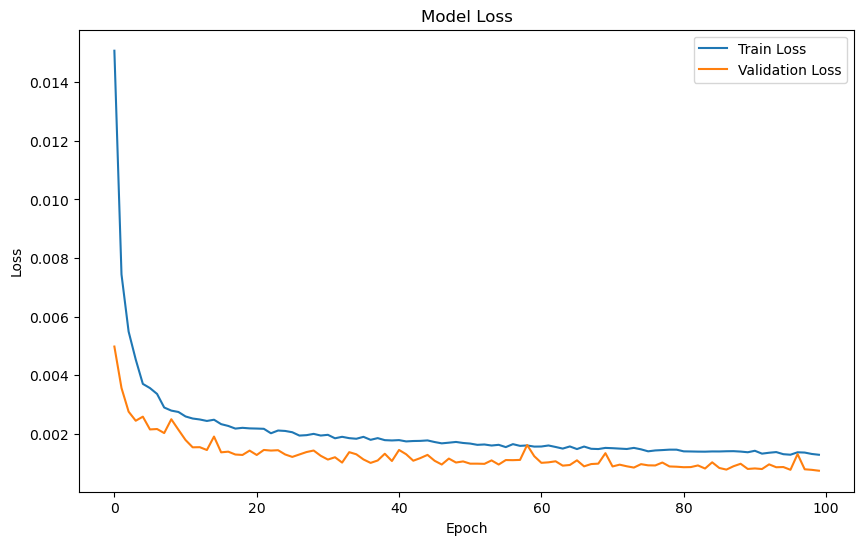

In [47]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout, Bidirectional
from tensorflow.keras.optimizers import Adam
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

layer_1 = 24
layer_2 = 24
lr = 0.001
epochs = 100
batch_size = 7
drop = 0.3
seq_length = 24
feature_dim = 9  

# Define the Bidirectional LSTM model
def create_bidirectional_model(input_shape):
    model = Sequential()
    model.add(Bidirectional(LSTM(units=layer_1, return_sequences=True), input_shape=input_shape))
    model.add(Dropout(drop))
    model.add(Bidirectional(LSTM(units=layer_2, return_sequences=False)))
    model.add(Dropout(drop))
    model.add(Dense(units=1))
    return model

# Compile the model
model = create_bidirectional_model((seq_length, feature_dim))
model.compile(optimizer=Adam(learning_rate=lr), loss='mean_squared_error')

# Train the model
history = model.fit(X_train, y_train, epochs=epochs, batch_size=batch_size, validation_data=(X_test, y_test))

# Evaluate the model
loss = model.evaluate(X_test, y_test)
print(f'Test Loss: {loss}')

# Save the model
model_path = 'summer_model/summer_5565_v1_bidir.h5'
model.save(model_path)

# Plot training & validation loss values
plt.figure(figsize=(10, 6))
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(loc='upper right')
plt.show()

42/42 [==============================] - 1s 2ms/step
Test MSE: 17.422640236875832


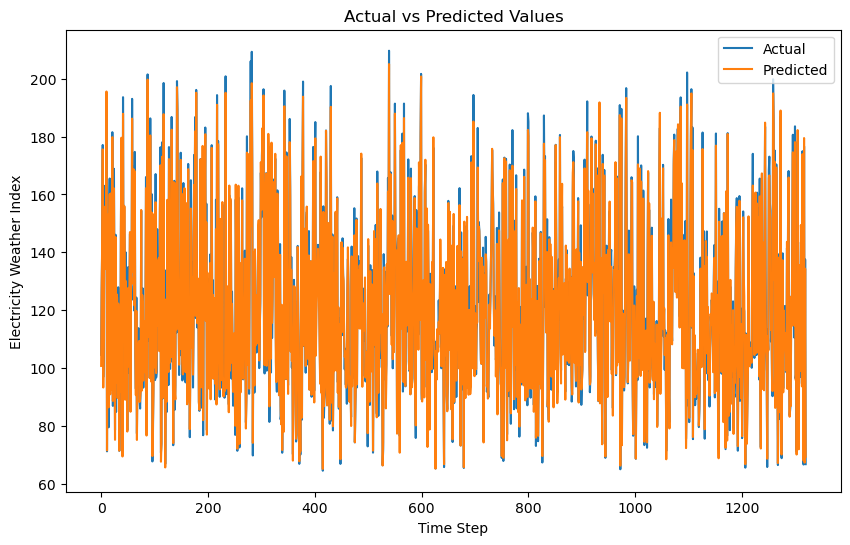

In [48]:

# Test and plot predictions
from sklearn.metrics import mean_squared_error

# Make predictions on the test data
y_pred = model.predict(X_test)

# Inverse transform the predictions and actual values
y_test_rescaled = target_scaler.inverse_transform(y_test)
y_pred_rescaled = target_scaler.inverse_transform(y_pred)

# Calculate MSE
mse = mean_squared_error(y_test_rescaled, y_pred_rescaled)
print(f'Test MSE: {mse}')

# Plot actual vs predicted values
plt.figure(figsize=(10, 6))
plt.plot(y_test_rescaled, label='Actual')
plt.plot(y_pred_rescaled, label='Predicted')
plt.title('Actual vs Predicted Values')
plt.xlabel('Time Step')
plt.ylabel('Electricity Weather Index')
plt.legend(loc='upper right')
plt.show()


layer_1 = 24
layer_2 = 24
lr = 0.001
epochs = 100
batch_size = 24
drop = 0.3
seq_length = 24
feature_dim = 9

Test MSE: 17.851889050813757

layer_1 = 24
layer_2 = 24
lr = 0.001
epochs = 100
batch_size = 7
drop = 0.3
seq_length = 24
feature_dim = 9 

Test MSE: 17.422640236875832 / 12m

### Weekly Sequence

In [52]:
import numpy as np
import pandas as pd

def create_weekly_sequences(input_data, target_data, seq_length=24*7):
    x = []
    y = []
    for i in range(len(input_data) - seq_length):
        x.append(input_data.iloc[i:i + seq_length].values)
        y.append(target_data.iloc[i + seq_length - 1].values)  # Target is the next time step's target value
    return np.array(x), np.array(y)

# Assuming 'scaled_input_data' and 'scaled_target_data' are the preprocessed DataFrames
X_weekly, y_weekly = create_weekly_sequences(scaled_input_data, scaled_target_data)

# Display the shape of the created sequences
print(X_weekly.shape, y_weekly.shape)

X_train, X_test, y_train, y_test = train_test_split(X_weekly, y_weekly, test_size=0.2, random_state=42)

print(X_test.shape, y_test.shape)

(6456, 168, 9) (6456, 1)
(1292, 168, 9) (1292, 1)


Epoch 1/100
31/31 [==============================] - 11s 222ms/step - loss: 0.0501 - val_loss: 0.0191
Epoch 2/100
31/31 [==============================] - 6s 191ms/step - loss: 0.0232 - val_loss: 0.0111
Epoch 3/100
31/31 [==============================] - 6s 193ms/step - loss: 0.0158 - val_loss: 0.0072
Epoch 4/100
31/31 [==============================] - 6s 198ms/step - loss: 0.0123 - val_loss: 0.0067
Epoch 5/100
31/31 [==============================] - 6s 200ms/step - loss: 0.0110 - val_loss: 0.0054
Epoch 6/100
31/31 [==============================] - 6s 201ms/step - loss: 0.0098 - val_loss: 0.0059
Epoch 7/100
31/31 [==============================] - 6s 200ms/step - loss: 0.0091 - val_loss: 0.0048
Epoch 8/100
31/31 [==============================] - 6s 201ms/step - loss: 0.0083 - val_loss: 0.0044
Epoch 9/100
31/31 [==============================] - 6s 200ms/step - loss: 0.0078 - val_loss: 0.0039
Epoch 10/100
31/31 [==============================] - 6s 202ms/step - loss: 0.0075 - val_l

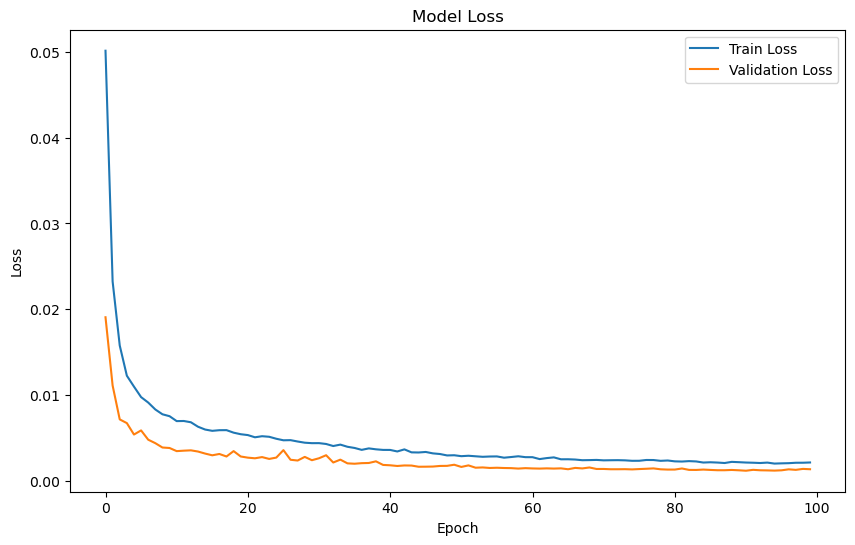

In [55]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout, Bidirectional
from tensorflow.keras.optimizers import Adam
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error

layer_1 = 24
layer_2 = 24
lr = 0.001
epochs = 100
batch_size = 168
drop = 0.3
seq_length = 24 * 7  # 일주일 단위 시퀀스
feature_dim = 9  # Assuming the feature dimension is 9


# Define the Bidirectional LSTM model
def create_bidirectional_model(input_shape):
    model = Sequential()
    model.add(Bidirectional(LSTM(units=layer_1, return_sequences=True), input_shape=input_shape))
    model.add(Dropout(drop))
    model.add(Bidirectional(LSTM(units=layer_2, return_sequences=False)))
    model.add(Dropout(drop))
    model.add(Dense(units=1))
    return model

# Compile the model
model = create_bidirectional_model((seq_length, feature_dim))
model.compile(optimizer=Adam(learning_rate=lr), loss='mean_squared_error')

# Train the model
history = model.fit(X_train, y_train, epochs=epochs, batch_size=batch_size, validation_data=(X_test, y_test))

# Evaluate the model
loss = model.evaluate(X_test, y_test)
print(f'Test Loss: {loss}')

# Save the model
model_path = 'summer_model/summer_5565_v1_weekly_bidirectional.h5'
model.save(model_path)

# Plot training & validation loss values
plt.figure(figsize=(10, 6))
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(loc='upper right')
plt.show()


41/41 [==============================] - 2s 13ms/step
Test MSE: 31.928048355703584


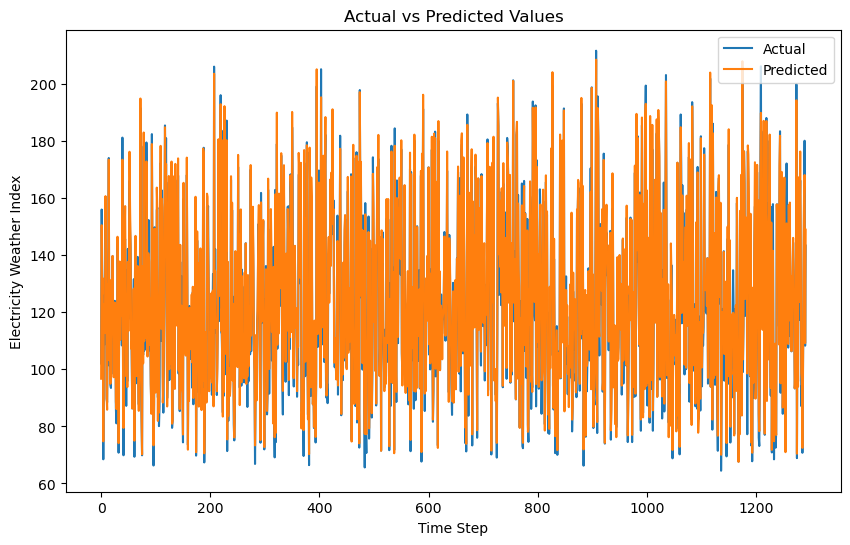

In [56]:
y_pred = model.predict(X_test)

# Inverse transform the predictions and actual values
y_test_rescaled = target_scaler.inverse_transform(y_test)
y_pred_rescaled = target_scaler.inverse_transform(y_pred)

# Calculate MSE
mse = mean_squared_error(y_test_rescaled, y_pred_rescaled)
print(f'Test MSE: {mse}')

# Plot actual vs predicted values
plt.figure(figsize=(10, 6))
plt.plot(y_test_rescaled, label='Actual')
plt.plot(y_pred_rescaled, label='Predicted')
plt.title('Actual vs Predicted Values')
plt.xlabel('Time Step')
plt.ylabel('Electricity Weather Index')
plt.legend(loc='upper right')
plt.show()